In [1]:
from datetime import datetime
import pandas as pd
from src.configs import LLAMMA_WSTETH
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from src.sim.scenario import Scenario
from copy import deepcopy
import secrets
from src.plotting.sim import plot_borrowers_2d, plot_borrowers_3d
from src.utils import get_historical_user_snapshots

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({"font.size": 10})
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.grid"] = False


%load_ext autoreload
%autoreload 2

In [3]:
# TODO Let's sample Q4 of 2023
start = int(datetime(2023, 10, 1).timestamp())
end = int(datetime(2024, 1, 1).timestamp())
df = get_historical_user_snapshots(LLAMMA_WSTETH, start, end)
df.head()

,user,collateral,depositedCollateral,collateralUp,loss,lossPct,stablecoin,n,n1,n2,debt,health,timestamp,collateral_log,debt_log
id,,,,,,,,,,,,,,,
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xff05bd3180bc8e38f7aea981fe2af57f277bd9df,0xff05bd3180bc8e38f7aea981fe2af57f277bd9df,1.190680,1.199174,1.190680,0.008494,0.708339,0,4,69,72,1110.846628,0.033859,1696089851,0.174524,7.012878
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfde66fb9f020de05531534eae35c3785d75ad59c,0xfde66fb9f020de05531534eae35c3785d75ad59c,7.805002,7.805002,7.805002,0.000000,0.000000,0,4,71,74,7137.306973,0.033783,1696089851,2.054765,8.873091
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfd81b27d9796a1ba7d7171ea70010c9befb2a62a,0xfd81b27d9796a1ba7d7171ea70010c9befb2a62a,127.251573,127.251573,127.251573,0.000000,0.000000,0,10,74,83,108602.582700,0.043226,1696089851,4.846166,11.595450
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfccc0f1d9a3373aa031c7883ec8aca1e1dd35f3a,0xfccc0f1d9a3373aa031c7883ec8aca1e1dd35f3a,14.000000,14.152796,14.000000,0.152796,1.079616,0,4,64,67,13722.482649,0.034760,1696089851,2.639057,9.526791
0x37417b2238aa52d0dd2d6252d989e728e8f706e4-1696089600-0xfcba7b991c337e78f5f36d5b37f229630d9cacd4,0xfcba7b991c337e78f5f36d5b37f229630d9cacd4,17.997159,20.049146,17.997159,2.051987,10.234784,0,4,10,13,29547.439346,0.062726,1696089851,2.890214,10.293752


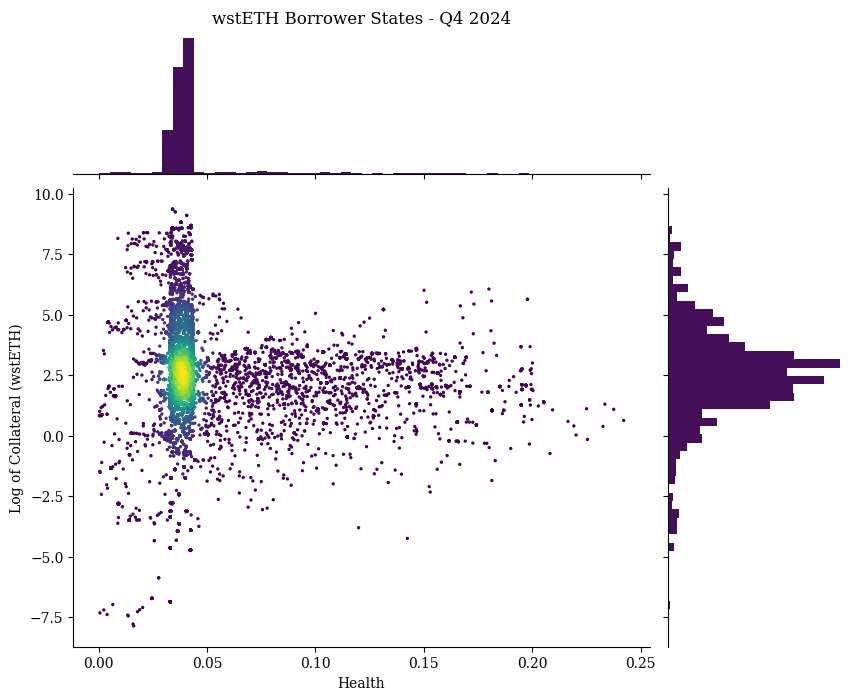

In [4]:
values = df[["health", "collateral_log"]].values.T
kde = stats.gaussian_kde(values)
density = kde(values)
fig = plot_borrowers_2d(*values, density)  # , xlim=(0.03, 0.05))

In [6]:
collateral_log_lim = df["collateral_log"].min(), df["collateral_log"].max()
health_lim = df["health"].min(), df["health"].max()
n_lim = df["n"].min(), df["n"].max()

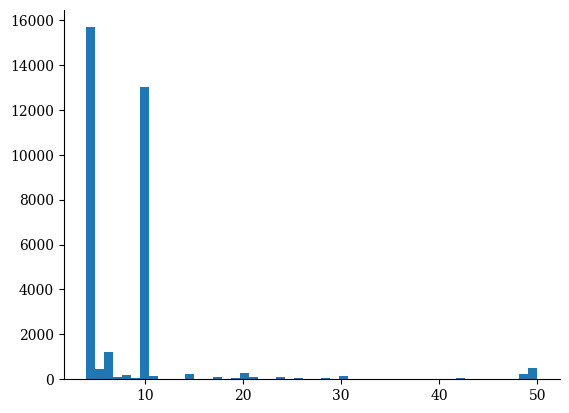

In [6]:
_ = df["n"].hist(bins=50, grid=False)

In [7]:
values = df[["health", "collateral_log", "n"]].values.T
kde = stats.gaussian_kde(values)
density = kde(values)
plot_borrowers_3d(*values, density)

# Randomly Sample Positions from KDE

Tried: KDE sampling health, collateral, and n, but it's not possible to quickly/accurately determine the corresponding debt required to arrive at that health because health is not a smooth/continuous/differentiable function.

New strategy: KDE sample debt, collateral, and n, and then check that health is reasonable. Plot the output and see if the generated positions are reasonable.

In [ ]:
def clean(debt_log, collateral_log, n):
    debt = int(np.exp(debt_log) * 1e18)
    collateral = int(np.exp(collateral_log) * 1e18)  # TODO decimals
    n = min(max(int(n), 4), 50)
    return debt, collateral, n


def vectorize(samples):
    vector = np.array(samples).T
    vector[0] = np.log((vector[0] / 1e18).astype(float))
    vector[1] = np.log((vector[1] / 1e18).astype(float))  # TODO decimals
    vector[3] /= 1e18
    return vector.astype(float)

In [83]:
scenario_ = Scenario("baseline_macro", ["wsteth"])

[INFO][21:15:38][src.sim.scenario]-76005: Fetching wsteth market from subgraph
[INFO][21:15:41][src.sim.scenario]-76005: Market snapshot as 2024-01-11 21:02:59
[INFO][21:15:41][src.sim.scenario]-76005: Bands snapshot as 2024-01-11 19:00:23
[INFO][21:15:41][src.sim.scenario]-76005: Users snapshot as 2024-01-11 15:09:47
[INFO][21:15:49][src.sim.scenario]-76005: Using 245600 1Inch quotes from 2023-11-19 19:00:00 to 2023-12-19 19:00:00
[INFO][21:15:50][src.utils.poolgraph]-76005: Found 20 valid trading cycles of length 3.


In [84]:
scenario = deepcopy(scenario_)
controller = scenario.controllers[0]

min_band = controller.AMM.min_band - 5  # Offset by a little bit
active_band = min_band + 1
controller.AMM.active_band = active_band
controller.AMM.min_band = min_band
p = controller.AMM.p_oracle_up(active_band)
controller.AMM.price_oracle_contract.last_price = p
controller.AMM.price_oracle_contract.freeze()
ts = controller._block_timestamp
controller.prepare_for_trades(ts + 60 * 60)
controller.AMM.prepare_for_trades(ts + 60 * 60)

In [85]:
def create_loans(values, num_samples):
    kde = stats.gaussian_kde(values)
    samples = []
    max_iters = 10 * num_samples
    i = 0
    while len(samples) < num_samples:
        if i > max_iters:
            raise Exception("Failed to create loans.")
        debt, collateral, n = clean(*kde.resample(1).T[0])
        try:
            health = controller.health_calculator("0xfoo", collateral, debt, False, n)
            samples.append((debt, collateral, n, health))
        except Exception as e:
            debt = controller.max_borrowable(collateral, n)
            health = controller.health_calculator("0xfoo", collateral, debt, False, n)
            samples.append((debt, collateral, n, health))
        i += 1
    del controller.loan["0xfoo"]
    return samples

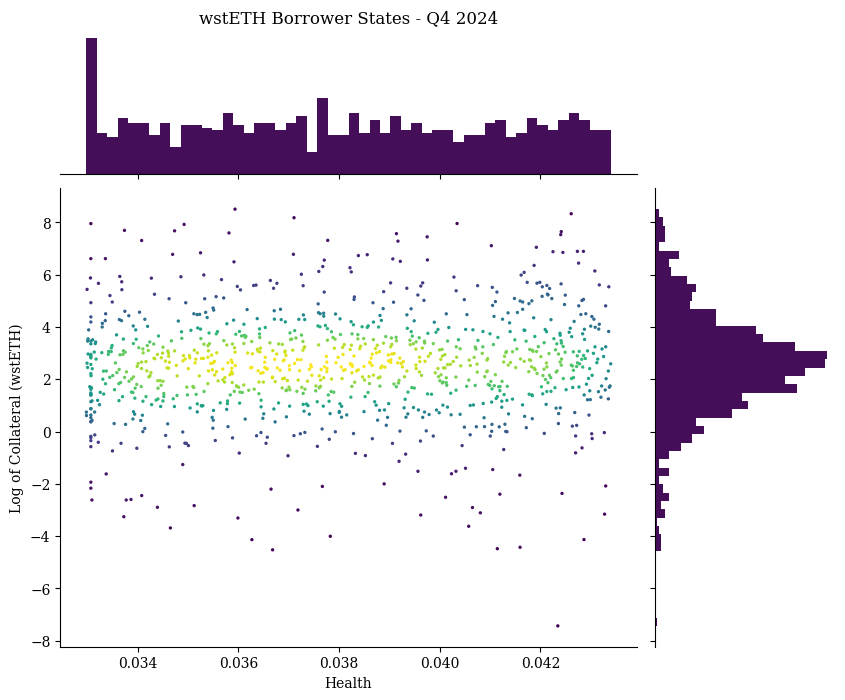

In [86]:
values = df[["debt_log", "collateral_log", "n"]].values.T
samples = create_loans(values, 1000)
vector = vectorize(samples)[[3, 1]]
sampled_kde = stats.gaussian_kde(vector)
sampled_density = sampled_kde(vector)
_ = plot_borrowers_2d(*vector, sampled_density)

### How many loans, how much total debt and collateral?

In [87]:
# Idea: repay all the debt and recreate loans
# Decide how many loans to create
# Create that many loans
# Check that debt is close to the long term average?

### What do we need from our resampled dataset?

- Similar total debt
- Similar total collateral
- Average total health?

If total debt or total collateral are too far away, scale it?

**What about initializing users in soft liquidation?**

In [92]:
# Clear the controller
users = list(controller.loan.keys())
for user in users:
    debt = controller._debt(user)[0]
    if debt > 0:
        controller.STABLECOIN._mint(user, debt)
    controller.repay(debt, user)
    del controller.loan[user]

assert controller.n_loans == 0
assert len(controller.loan) == 0
assert controller.total_debt() == 0

In [95]:
NUM_LOANS = 350
TOLERANCE = 1e-4

samples = create_loans(values, NUM_LOANS)
for debt, collateral, n, health in samples:
    user = "0x" + secrets.token_hex(20)
    controller.COLLATERAL_TOKEN._mint(user, collateral)
    controller.create_loan(user, collateral, debt, n)
    loaded_health = controller.health(user)
    assert abs(health - loaded_health) / health < TOLERANCE

In [96]:
scenario.oracles[0].unfreeze()
scenario.prepare_for_run()

[INFO][21:18:57][src.sim.scenario]-76005: Equilibrated prices with 2 arbitrages with total profit 12942
[INFO][21:18:57][src.sim.scenario]-76005: Validating loaded positions in wstETH Controller.
[INFO][21:18:57][src.sim.scenario]-76005: Liquidating 0x2ee27e4ab40ce171e1a95b7bc0e8bb2ac43f33c2: with debt 8033994452631797972540.
[INFO][21:18:57][src.sim.scenario]-76005: Liquidating 0xff2357d0f7071e68a88005f7300f882564733f17: with debt 39944054584167527914689.
[INFO][21:18:57][src.sim.scenario]-76005: Liquidating 0x1cb6a9b9e98bf6d302bd928d9c9283d83a5576f8: with debt 12812856527321551127688.
[INFO][21:18:57][src.sim.scenario]-76005: Liquidating 0x76badcb701e27f7a0309d4d3794c96bf9931cf5f: with debt 5030648420320375531224.
[INFO][21:18:57][src.sim.scenario]-76005: Liquidating 0xe662151db95c81dee24a7f5c4eb655650fc75884: with debt 17512983668752984517870.
[INFO][21:18:57][src.sim.scenario]-76005: Liquidating 0x15566b45281f877b1c69ede6af2c2c8762634a82: with debt 4426541403336791225554.
[INFO][21

In [97]:
def plot_reserves(llamma):
    """Plot LLAMMA reserves."""
    band_range = range(llamma.min_band, llamma.max_band + 1)
    bands_x = [llamma.bands_x[i] / 1e18 for i in band_range]
    bands_y = [llamma.bands_y[i] * llamma.price_oracle() / 1e36 for i in band_range]
    band_edges = [llamma.p_oracle_down(i) / 1e18 for i in band_range]
    band_widths = [llamma.p_oracle_up(i) / llamma.A * 0.9 / 1e18 for i in band_range]

    f, ax = plt.subplots(figsize=(8, 5))
    ax.bar(
        band_edges, bands_y, color="royalblue", width=band_widths, label="Collateral"
    )
    ax.bar(
        band_edges,
        bands_x,
        bottom=bands_y,
        color="indianred",
        width=band_widths,
        label="crvusd",
    )
    ax.set_xlabel("p_o_down[n] (USD)")
    ax.set_ylabel("Reserves (USD)")
    ax.set_title("LLAMMA Collateral Distribution")
    ax.axvline(
        llamma.price_oracle() / 1e18,
        color="black",
        linestyle="--",
        label="Oracle price",
    )
    ax.axvline(llamma.get_p() / 1e18, color="green", linestyle="--", label="AMM price")

    # f.legend(loc="upper center", bbox_to_anchor=(0.5, 0), ncol=4)
    ax.legend()

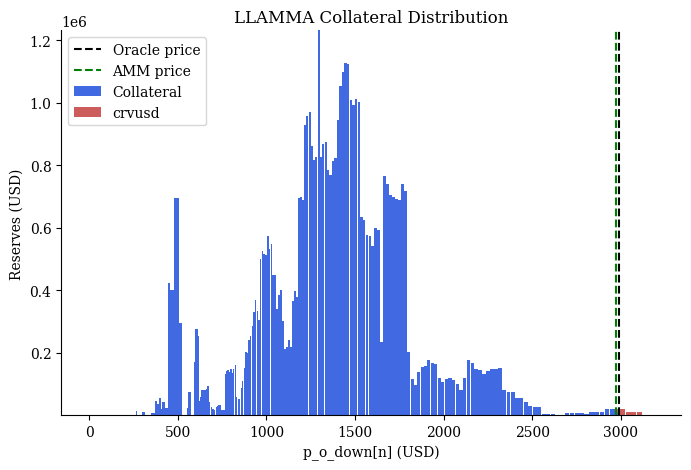

In [98]:
plot_reserves(controller.AMM)

In [99]:
loaded = []
for user in controller.loan:
    health = controller.health(user) / 1e18
    collateral_log = np.log(controller.AMM.get_sum_xy(user)[1] / 1e18)
    loaded.append((health, collateral_log))
loaded = np.array(loaded).T

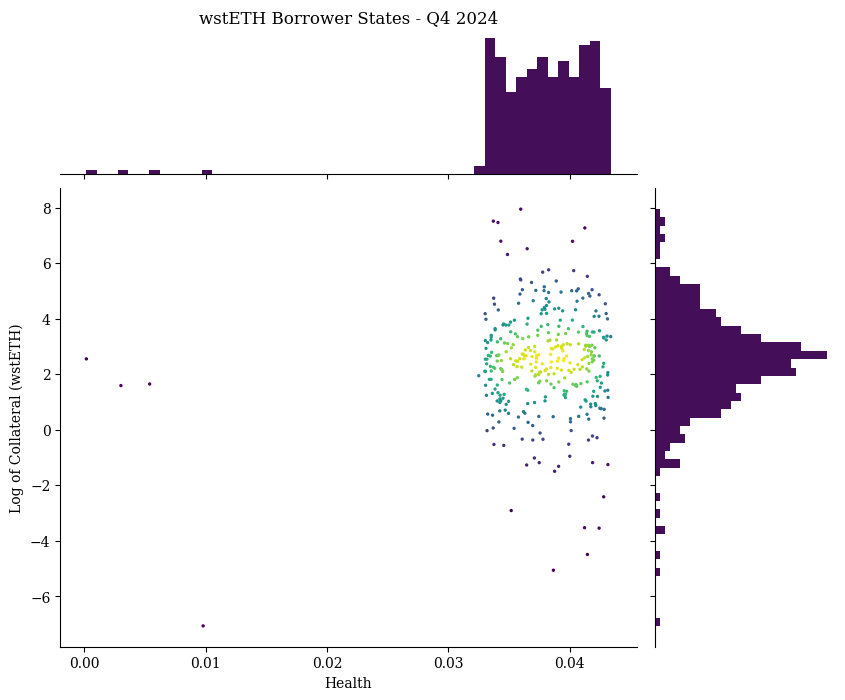

In [100]:
kde = stats.gaussian_kde(loaded)
density = kde(loaded)
fig = plot_borrowers_2d(*loaded, density)  # , xlim=(0.03, 0.05))